# Project test

In this assignment, we are going to improve our codes in PattRecClasses and implement forward algorithm inside MarkovChain code as well as functions such as logprob and prob in Guassian in order to generate proper input values for forward algorithm.

In [1]:
from PattRecClasses import HMM_TA 
import scipy.stats
from matplotlib import pyplot as plt
# For the code to work you might have to pip install scipy

from CharacterFeatureExtractor import featureExtractor
from DrawCharacter import DrawCharacter

import numpy as np

import pandas as pd


In [2]:
'''
Multivariate Gaussian Distribution Class
'''
class multigaussD:
    mean = np.array([0])
    cov = np.array([[0]])
    def __init__(self, mu, C):
        if C.shape[0] is not C.shape[1]:
            print("error, non-square covariance matrix supplied")
            return
        if mu.shape[0] is not C.shape[0]:
            print("error, mismatched mean vector and covariance matrix dimensions")
            return
        self.mean = mu
        if np.where(np.diag(C)==0)[0].shape[0] != 0:
            C += np.diagflat(np.ones(C.shape[0])/10000)
        C[np.isnan(C)]=1
        self.cov = C
        return
    def random(self, num):
        return np.random.multivariate_normal(self.mean, self.cov, num)
    def rand(self):
        return np.random.multivariate_normal(self.mean, self.cov, 1)[0]
    def likelihood(self, X):
        p = scipy.stats.multivariate_normal(self.mean, self.cov, 1)
        pd = p.pdf(X)
        return pd
    def loghood(self, X):
        return np.log(self.likelihood(X))
    def getmean(self):
        return self.mean
    def getcov(self):
        return self.cov
    
def prob(x, B):
    T = x.shape[0]
    N = B.shape[0]
    res = np.zeros((T, N))
    for i in range(T):
        for j in range(N):
            res[i,j] = B[j].likelihood(x[i])
    scaled = np.zeros(res.shape)
    for i in range(scaled.shape[0]):
        for j in range(scaled.shape[1]):
            scaled[i, j] = res[i,j]/np.amax(res[i])
    return res, scaled


def logprob(x, B):
    res, scaled = prob(x,B)
    return np.log(res), np.log(scaled)

# Code skeleton

In [3]:
### data prep
db_name = "database_test"
data_features = pd.read_pickle(r'data/' + db_name + '_features.cdb')
data_labels = pd.read_pickle(r'data/' + db_name + '_labels.cdb')

# data_features[k][r] == np.array (ndim, t); K (number of letters) of R samples with Tr individual lengths
# print((data_features[1][1].shape))
print(data_labels)

# train for one character (seen from labels)

hm_learn = [0,0,0,0,0]

# Start by assigning initial HMM parameter values,
# then refine these iteratively

# A (char = 0)
# States = 3
qstar = np.array([1, 0, 0])
Astar = np.array([[0.9, 0.1, 0], [0, 0.9, 0.1], [0, 0, 1]])
meansstar = np.array([[10, 60], [10, -70], [40,0]])
covsstar = np.array([[[1, 1], [1, 1]],
                     [[1, 1], [1, 1]], [[1,1],[1,1]]])
Bstar = np.array([multigaussD(meansstar[0], covsstar[0]),
                  multigaussD(meansstar[1], covsstar[1]), 
                  multigaussD(meansstar[2], covsstar[2])])

hm_learn[0] = HMM_TA.HMM(qstar, Astar, Bstar)

# C (char = 1)
# States = 5 ...

# X (char = 4)
# States = 2
qstar = np.array([1, 0])
Astar = np.array([[0.9, 0.1], [0, 1]])
meansstar = np.array([[10, -60], [45, 70]])
covsstar = np.array([[[1, 1], [1, 1]],
                     [[1, 1], [1, 1]]])
Bstar = np.array([multigaussD(meansstar[0], covsstar[0]),
                  multigaussD(meansstar[1], covsstar[1])])

hm_learn[4] = HMM_TA.HMM(qstar, Astar, Bstar)

# Train and test for X
char = 4

obs = data_features[char]
oos_obs = data_features[char-1]
# obsTA = np.array([ hm_learn.rand(100)[0] for _ in range(10) ])
# print(type(obsTA))
# print(obsTA[1].shape) == (100,2)
# Our data has format (2,15) ! Transpose all datapoints
for i in range(len(obs)):
    obs[i] = np.transpose(obs[i])
for i in range(len(oos_obs)):
    oos_obs[i] = np.transpose(oos_obs[i])

# Data information
"""
print(len(obs))
print(obs[len(obs) - 1].shape)
print(type(obs))
print(obs[1])
"""

# Divide data into training and testing
train_obs = obs[0:3]
test_obs = obs[4]

# Training

print("Running the Baum Welch Algorithm...")
hm_learn[char].baum_welch(train_obs, 20, prin=1, uselog=False)

# Testing on out of sample and test obs
a, c = hm_learn[char].alphahat(oos_obs[2])
print("Prob oos", c)
a, c = hm_learn[char].alphahat(test_obs)
print("Prob is", c)



# Train and test for A
char = 0
obs = data_features[char]
oos_obs = data_features[char+1]
# obsTA = np.array([ hm_learn.rand(100)[0] for _ in range(10) ])
# print(type(obsTA))
# print(obsTA[1].shape) == (100,2)
# Our data has format (2,15) ! Transpose all datapoints
for i in range(len(obs)):
    obs[i] = np.transpose(obs[i])
for i in range(len(oos_obs)):
    oos_obs[i] = np.transpose(oos_obs[i])

# Data information
"""
print(len(obs))
print(obs[len(obs) - 1].shape)
print(type(obs))
print(obs[1])
"""

# Divide data into training and testing
train_obs = obs[0:3]
test_obs = obs[4]

# Training

print("Running the Baum Welch Algorithm...")
hm_learn[char].baum_welch(train_obs, 20, prin=1, uselog=False)

# Testing on out of sample and test obs
a, c = hm_learn[char].alphahat(oos_obs[2])
print("Prob oos", c)
a, c = hm_learn[char].alphahat(test_obs)
print("Prob is", c)

['A', 'C', 'K', 'P', 'X']
Running the Baum Welch Algorithm...
Estimated a:
[1. 0.]

Estimated A:
[[0.9 0.1]
 [0.  1. ]]

Estimated means:
[[ 10.21573854 -57.85796827]
 [ 40.13213709  53.23985508]]

Estimated covariances:
[[[  1.34057437  -0.92564934]
  [ -0.92564934  66.96510381]]

 [[ 39.81819851 -27.9325089 ]
  [-27.9325089  123.2848896 ]]]
Prob oos [4.78084737e-66 1.00000000e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Prob is [1.  0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.1 1.  1.  1.  1.  1.
 1.  1.  1.  1.  1. ]
Running the Baum Welch Algorithm...
Estimated a:
[1. 0. 0.]

Estimated A:
[[0.89655241 0.10344759 0.        ]
 [0.         0.888888

# TA test

In [4]:
# Define a HMM
q = np.array([0.8, 0.2])
A = np.array([[0.95, 0.05],
            [0.30, 0.70]])

means = np.array( [[0, 0], [2, 2]] )
covs  = np.array( [[[1, 2],[2, 4]], 
                [[1, 0],[0, 3]]] )

B = np.array([multigaussD(means[0], covs[0]),
            multigaussD(means[1], covs[1])])


hm  = HMM_TA.HMM(q, A, B)


# Test that baum_welch works with inputs on the same format as us
obs = []  
for i in range(10): 
    obs += [hm.rand(100)[0]]

print(obs[1].shape)
print(obs[1])
print(type(obs))

print('True HMM parameters:')
print('q:')
print(q)
print('A:')
print(A)
print('B: means, covariances')
print(means)
print(covs)

(100, 2)
[[ 0.86892215  1.73784433]
 [ 1.10617964  2.21235929]
 [ 1.24098616  2.48197231]
 [-0.69831156 -1.39662315]
 [ 0.99425213  1.98850425]
 [-0.43803599 -0.876072  ]
 [-0.50595834 -1.01191672]
 [ 0.64263075  1.28526151]
 [ 0.3392043   0.67840862]
 [-0.59129406 -1.18258811]
 [ 0.47741603  0.95483203]
 [ 1.49550202  2.99100405]
 [ 0.27144249  0.542885  ]
 [ 3.04648966  1.0549967 ]
 [ 2.61604757  1.85880236]
 [ 2.3219382   3.80037868]
 [ 0.68504403  1.37008809]
 [ 0.22195594  0.44391189]
 [-1.05819619 -2.11639239]
 [-0.50942051 -1.01884102]
 [ 0.26321378  0.52642758]
 [-0.3494359  -0.69887179]
 [-2.58039979 -5.16079962]
 [-0.32334574 -0.64669154]
 [ 1.19538622  3.02929314]
 [ 0.49020304  0.98040604]
 [-0.6033811  -1.20676216]
 [ 1.23047448  2.46094896]
 [-1.74735682 -3.49471366]
 [ 1.18556099  2.37112198]
 [-2.15392513 -4.30785031]
 [-0.40815433 -0.81630863]
 [-0.28333585 -0.56667175]
 [-0.6154546  -1.23090917]
 [-0.89464346 -1.7892869 ]
 [-0.22324387 -0.44648778]
 [-0.59519719 -1.19

In [5]:
# Estimate the HMM parameters from the obseved samples
# Start by. assigning initial HMM parameter values,
# then refine these iteratively
qstar = np.array([0.8, 0.2])
Astar = np.array([[0.5, 0.5], [0.5, 0.5]])

meansstar = np.array( [[0, 0], [0, 0]] )

covsstar  = np.array( [[[1, 0],[0, 1]], 
                       [[1, 0],[0,1]]] )

Bstar = np.array([multigaussD(meansstar[0], covsstar[0]),
                  multigaussD(meansstar[1], covsstar[1])])


hm_learn = HMM_TA.HMM(qstar, Astar, Bstar)

print("Running the Baum Welch Algorithm...")
hm_learn.baum_welch(obs, 20, prin=1, uselog=False)

# obs is in the format:
# obsTA = np.array([ hm.rand(100)[0] for _ in range(10) ])
# ; shape (10 2 100)

# test
# Test the Viterbi algorithm
print("Running the Viterbi Algorithm...")
obs, true_states = hm.rand(100)

print("True States:\n",true_states)
print("Predicted States:\n", hm_learn.viterbi(obs))

####### SOMETIMES ALL RESULTS ARE TRANSPOSED/INVERTED MATRIXES!!!
####### and sometimes it just works. Great stuff

# descision

Running the Baum Welch Algorithm...
Estimated a:
[0.2237977 0.7762023]

Estimated A:
[[0.69807311 0.30192689]
 [0.04865139 0.95134861]]

Estimated means:
[[2.04106685 1.73863983]
 [0.00429009 0.00837311]]

Estimated covariances:
[[[ 1.09290955 -0.20487714]
  [-0.20487714  2.88672322]]

 [[ 0.98538115  1.97070759]
  [ 1.97070759  3.94134815]]]
Running the Viterbi Algorithm...
True States:
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
Predicted States:
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]


/home/jonas/Local/Pattern-Recognition-Project/PattRecClasses/HMM_TA.py:329: RuntimeWarning: divide by zero encountered in log
  return np.log(res), np.log(scaled)


# P test

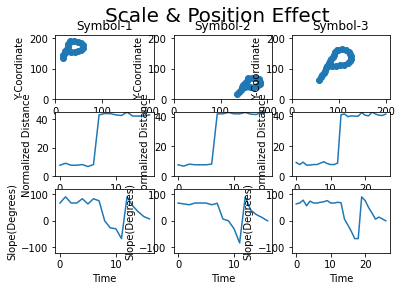

In [6]:
#Get symbol-1 (small p on top left quadrant)
dc1 = np.load("data/P_top_left.npy")

#Get symbol-2 (small p on bottom right quadrant)
dc2 = np.load("data/P_bottom_right.npy")

#Get symbol-3(twice as big p filling entire window)
dc3 = np.load("data/P_big.npy")

thr = 8 # threshold for sampling and distance normalization

# #Feature vectors are returned
feature_symbol1, sampled_symbol1 = featureExtractor(dc1,thr,False)
feature_symbol2, sampled_symbol2 = featureExtractor(dc2,thr,False)
feature_symbol3, sampled_symbol3 = featureExtractor(dc3,thr,False)


# normalized distance ,slope, and t for symbol-1
f1_symbol1 = feature_symbol1[0]
f2_symbol1 = feature_symbol1[1]
t1 = np.array(range(0,feature_symbol1.shape[1]))


# normalized distance ,slope, and t for symbol-2
f1_symbol2 = feature_symbol2[0]
f2_symbol2 = feature_symbol2[1]
t2 = np.array(range(0,feature_symbol2.shape[1]))

# normalized distance ,slope, and t for symbol-2
f1_symbol3 = feature_symbol3[0]
f2_symbol3 = feature_symbol3[1]
t3 = np.array(range(0,feature_symbol3.shape[1]))

f, axarr = plt.subplots(3, 3)
f.suptitle('Scale & Position Effect', fontsize=20)


#------------- SYMBOL DRAWINGS
#Drawing of sampled symbol-1
axarr[0, 0].scatter(sampled_symbol1[0], sampled_symbol1[1])
axarr[0, 0].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
axarr[0, 0].set_title('Symbol-1')
axarr[0, 0].set_xlim([0,210])
axarr[0, 0].set_ylim([0,210])

#Drawing of sampled symbol-2
axarr[0, 1].scatter(sampled_symbol2[0], sampled_symbol2[1])
axarr[0, 1].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
axarr[0, 1].set_title('Symbol-2')
axarr[0, 1].set_xlim([0,210])
axarr[0, 1].set_ylim([0,210])

#Drawing of sampled symbol-3
axarr[0, 2].scatter(sampled_symbol3[0], sampled_symbol3[1])
axarr[0, 2].set(xlabel = "X-Coordinate", ylabel = "Y-Coordinate")
axarr[0, 2].set_title('Symbol-3')
axarr[0, 2].set_xlim([0,210])
axarr[0, 2].set_ylim([0,210])

#------------- ABSOLUTE DISTANCE FEATURE

#Absolute distance plot of symbol-1
axarr[1, 0].plot(t1, f1_symbol1)
axarr[1, 0].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[1, 0].set_ylim([0,np.max(f1_symbol1)])

#Absolute distance plot of symbol-2
axarr[1, 1].plot(t2, f1_symbol2)
axarr[1, 1].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[1, 1].set_ylim([0,np.max(f1_symbol2)])

#Absolute distance plot of symbol-3
axarr[1, 2].plot(t3, f1_symbol3)
axarr[1, 2].set(xlabel = "Time", ylabel = "Normalized Distance")
axarr[1, 2].set_ylim([0,np.max(f1_symbol3)])

#------------- SLOPE FEATURE

#Y-wise distance plot of symbol-1
axarr[2, 0].plot(t1, f2_symbol1)
axarr[2, 0].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[2, 0].set_ylim([-120,120])

#Y-wise distance plot of symbol-2
axarr[2, 1].plot(t2, f2_symbol2)
axarr[2, 1].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[2, 1].set_ylim([-120,120])

#Y-wise distance plot of symbol-3
axarr[2, 2].plot(t3, f2_symbol3)
axarr[2, 2].set(xlabel = "Time", ylabel = "Slope(Degrees)")
axarr[2, 2].set_ylim([-120,120])

plt.savefig('fig/P_test.png', bbox_inches='tight', dpi = 300)
